In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-27 09:36:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.10’

housing.csv.10      100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2023-09-27 09:36:08 (77.3 MB/s) - ‘housing.csv.10’ saved [1423529/1423529]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.dtypes[data.dtypes == 'object']

ocean_proximity    object
dtype: object

In [5]:
data.ocean_proximity = data.ocean_proximity.str.lower()
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near bay


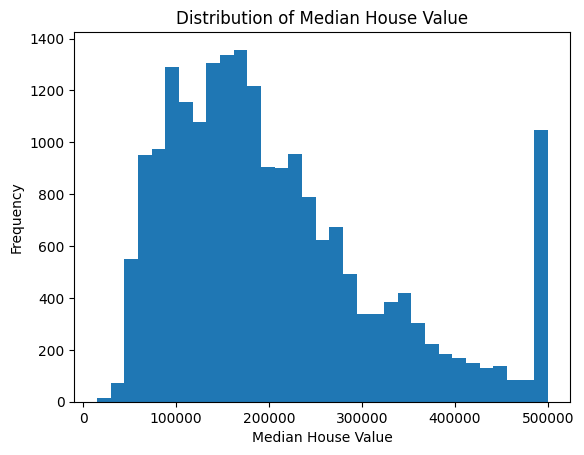

In [6]:
plt.hist(data['median_house_value'], bins=33)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show();

In [7]:
data.ocean_proximity.unique()

array(['near bay', '<1h ocean', 'inland', 'near ocean', 'island'],
      dtype=object)

In [8]:
data = data[data['ocean_proximity'].isin(['<1h ocean', 'inland'])]

In [9]:
data = data[[
    'latitude', 'longitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'median_house_value']]


Question 1
There's one feature with missing values. What is it?

total_rooms \
total_bedrooms \
population \
households


In [10]:
data.isna().sum()
# Total_bedrooms is missing with 157 values

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'population'?

995
1095
1195
1295
Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [11]:
data['population'].describe()
# Check at 50% percentile

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [12]:
n = len(data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [13]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
X_train = data.iloc[idx[n_train:]]
X_val = data.iloc[idx[n_train: n_train+n_val]]
X_test = data.iloc[idx[idx[n_train+n_val:]]]

In [14]:
print(len(X_train), len(X_val), len(X_test))
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

6274 3137 3137


In [15]:
y_train = np.log1p(X_train.median_house_value)
y_val = np.log1p(X_val.median_house_value)
y_test = np.log1p(X_test.median_house_value)

del X_train['median_house_value']
del X_val['median_house_value']
del X_test['median_house_value']

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [16]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]


In [17]:
X_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [18]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X_train0 = X_train[base].fillna(0).values
w0, w = train_linear_regression(X_train0, y_train)

y_pred = w0 + X_train0.dot(w)

In [19]:
X_train['total_bedrooms'].replace(np.nan, np.mean(X_train['total_bedrooms']), inplace=True)
X_train.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

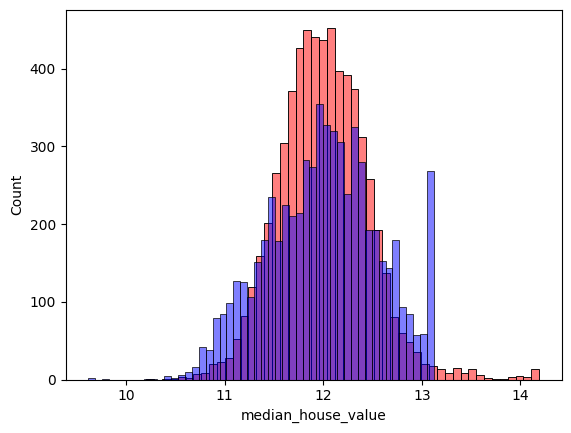

In [20]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

In [21]:
X_val0 = X_val[base].fillna(0).values
y_pred_val = w0 + X_val0.dot(w)

In [22]:
X_train = X_train[base].values
w0_mean, w_mean = train_linear_regression(X_train, y_train)

y_pred_mean = w0_mean + X_train.dot(w_mean)


X_val['total_bedrooms'].replace(np.nan, np.mean(X_val['total_bedrooms']), inplace=True)
X_val = X_val[base].values
y_pred_val_mean = w0_mean + X_val.dot(w_mean)

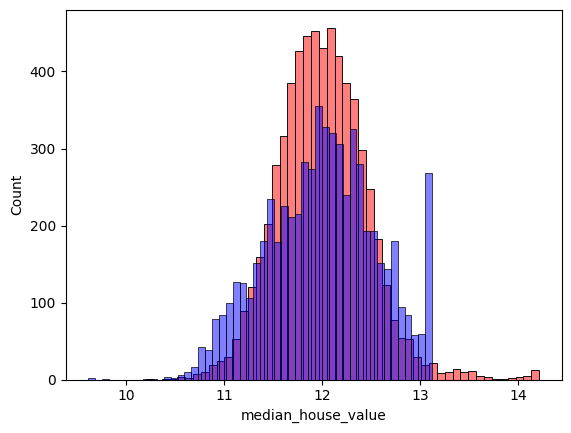

In [23]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

In [24]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error**2
  mse = np.mean(se)
  return np.sqrt(mse)

In [25]:
## Validation

In [26]:
print(round(rmse(y_val, y_pred_val),2))
print(round(rmse(y_val, y_pred_val_mean),2))

0.34
0.34


In [27]:
rmse(y_val, y_pred_val)

0.3402352761610882

In [28]:
rmse(y_val, y_pred_val_mean)

0.3400350179991588

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [29]:
def train_test_split(filepath, num_seed=42):
  data = pd.read_csv('housing.csv')
  data.ocean_proximity = data.ocean_proximity.str.lower()
  data = data[data['ocean_proximity'].isin(['<1h ocean', 'inland'])]
  data = data[[
    'latitude', 'longitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'median_house_value']]
  n = len(data)
  n_val = int(n*0.2)
  n_test = int(n*0.2)
  n_train = n - n_val - n_test
  idx = np.arange(n)
  np.random.seed(num_seed)
  np.random.shuffle(idx)
  X_train = data.iloc[idx[n_train:]]
  X_val = data.iloc[idx[n_train: n_train+n_val]]
  X_test = data.iloc[idx[idx[n_train+n_val:]]]
  X_train = X_train.reset_index(drop=True)
  X_val = X_val.reset_index(drop=True)
  X_test = X_test.reset_index(drop=True)
  y_train = np.log1p(X_train.median_house_value)
  y_val = np.log1p(X_val.median_house_value)
  y_test = np.log1p(X_test.median_house_value)

  del X_train['median_house_value']
  del X_val['median_house_value']
  del X_test['median_house_value']
  X_train = X_train.fillna(0).values
  X_val = X_val.fillna(0).values
  X_test = X_test.fillna(0).values
  return X_train, y_train, X_val, y_val, X_test, y_test


In [30]:
X_train, y_train, X_val, y_val, X_test, y_test = train_test_split('housing.csv')

In [31]:
def train_linear_regression_reg(X,y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [32]:
w0, w = train_linear_regression_reg(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [33]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
r_lst = []
for ele in r:
  w0, w = train_linear_regression_reg(X_train, y_train, r=ele)

  y_pred = w0 + X_val.dot(w)
  result = round(rmse(y_val, y_pred),2)
  r_lst.append(result)


In [34]:
r_lst

[0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.35, 0.35, 0.35]

In [35]:
np.min(r)

0.0

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [36]:
seed_lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst_rmse = []
for seed in seed_lst:
  X_train, y_train, X_val, y_val, X_test, y_test = train_test_split('housing.csv', num_seed=seed)
  w0, w = train_linear_regression(X_train, y_train)

  y_pred = w0 + X_val.dot(w)
  result = round(rmse(y_val, y_pred),2)
  lst_rmse.append(result)



In [37]:
round(np.std(lst_rmse),3)

0.006

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [38]:
X_train, y_train, X_val, y_val, X_test, y_test = train_test_split('housing.csv', num_seed=9)
X_concat = np.concatenate((X_train, X_val))
y_concat = np.concatenate((y_train, y_val))

In [39]:
w0, w = train_linear_regression_reg(X_concat, y_concat, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.3410111145217415